In [8]:
from sklearn.datasets import make_blobs

In [9]:
X,y_true=make_blobs(n_samples=300,centers=4,random_state=42)

In [10]:
import matplotlib.pyplot as plt

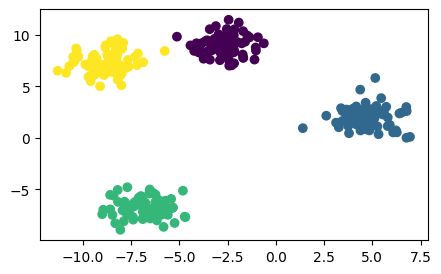

In [11]:
plt.figure(figsize=(5,3))
plt.scatter(X[:,0],X[:,1], c=y_true)
plt.show()

In [12]:
import pandas as pd

df =pd.read_csv("Mall_Customers.csv")
df.head(1)

In [13]:
X = df[ ["Annual Income (k$)", "Spending Score (1-100)"]].values #df->arraye çevirir


NameError: name 'df' is not defined

In [14]:
from sklearn.cluster import KMeans

In [15]:
model= KMeans(n_clusters=3,random_state=42)
model.fit(X)

KMeans(n_clusters=3, random_state=42)

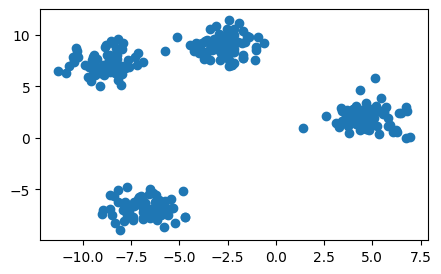

In [16]:
plt.figure(figsize=(5,3))
plt.scatter(X[:,0],X[:,1])
plt.show()

In [17]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(X)

KMeans(n_clusters=3, random_state=42)

In [18]:
y = model.predict(X)

In [19]:
model.cluster_centers_

array([[-5.75060003,  8.08498739],
       [-6.83235205, -6.83045748],
       [ 4.7182049 ,  2.04179676]])

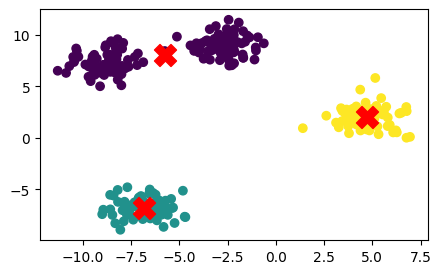

In [20]:
plt.figure(figsize=(5,3))
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='red', marker='X',s=250)
plt.show()

In [21]:
#parametre belirleme stratejisi

In [22]:
#inertia-> her elemanın kendi küme merkezine olan uzaklıklarının karelerinin toplamı
model.inertia_

2110.412521895329

In [23]:

# Elbow Method - Dirsek 
def elbow_method():
    inertias = []
    for k in range(2,11):
        model = KMeans(n_clusters=k, random_state=42)
        model.fit(X)
        inertias.append( model.inertia_ )
    plt.figure(figsize=(5,3))
    plt.plot(range(2,11), inertias)
    print(inertias)


[9416.214004352272, 2110.412521895329, 564.9141808210252, 513.0329042790798, 462.0960007878173, 411.3489318727926, 365.3555992995912, 332.03645710154746, 291.5608624106775]


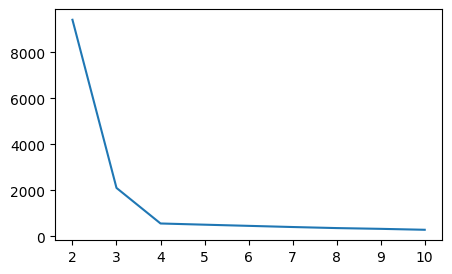

In [24]:
elbow_method()

In [25]:

model2 = KMeans(n_clusters=5,random_state=42)
model2.fit(X)
y = model2.predict(X)

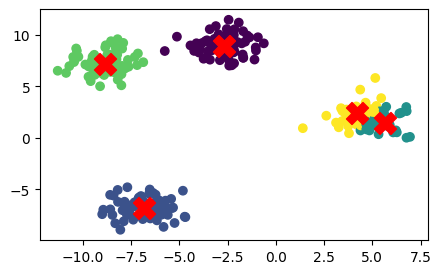

In [26]:
plt.figure(figsize=(5,3))
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(model2.cluster_centers_[:,0], model2.cluster_centers_[:,1], c='red', marker='X',s=250)
plt.show()

In [27]:
#Silhouette Method-> Kendi merkezine ne kadar yakın ve diğer merkezlere ne kadar uzak

In [28]:
from sklearn.metrics import silhouette_score

In [29]:
def silh_method():
    scores=[]
    for k in range(2,11):
        model=KMeans(n_clusters=k,random_state=42)
        y=model.fit_predict(X)
        scores.append(silhouette_score(X,y))
    plt.figure(figsize=(5,3))
    plt.plot(range(2,11),scores)

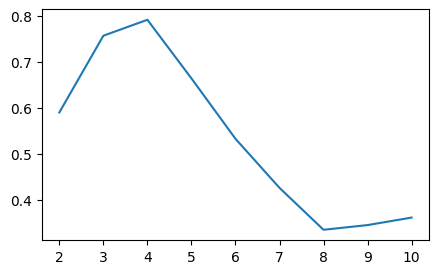

In [30]:
silh_method()
#1e yaklaştıkça daha iyi performans

# OCR


In [33]:
from PIL import Image
import pytesseract

img = Image.open('musteri_belgesi.png') #eklenecek
metin = pytesseract.image_to_string(img)
print(metin)

FileNotFoundError: [Errno 2] No such file or directory: 'musteri_belgesi.png'

In [32]:
pip install pytesseract


  Using cached pytesseract-0.3.13-py3-none-any.whl.metadata (11 kB)
Using cached pytesseract-0.3.13-py3-none-any.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# OCR ile veri al
text = pytesseract.image_to_string(Image.open("musteri.png"))

# Örnek: "Name: Ayşe\nAge: 25\nAnnual Income: 45\nSpending Score: 70"
lines = text.split('\n')
data = {}
for line in lines:
    if ':' in line:
        key, value = line.split(':')
        data[key.strip()] = int(value.strip()) if value.strip().isdigit() else value.strip()

# Model için uygun hale getir
import pandas as pd
new_customer = pd.DataFrame([{
    'Age': data.get('Age', 0),
    'Annual Income (k$)': data.get('Annual Income', 0),
    'Spending Score (1-100)': data.get('Spending Score', 0)
}])

# K-Means modeli ile tahmin
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
model.fit(existing_customer_data)  # Burada csv'deki veri kullanılır
cluster = model.predict(new_customer)
print(f"Bu müşteri {cluster[0]}. kümeye aittir.")
